This is a notebook explained correlation study about drug in Malaysia with hyper-dimension data-set got from data.gov.my

All I use Pearson correlation, stated as below:

![alt text](http://www.statisticshowto.com/wp-content/uploads/2011/11/pearsonequation.jpg)

![alt text](https://i.stack.imgur.com/AcC3d.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

In [2]:
location = '/home/huseinzol05/Desktop/Introduction-DataScience-Python/dadah/'
files = os.listdir(location)
files

['statitisk-jenayah-indeks-seluruh-malaysia--mengikut-jenis-jenayah-negeri-dan-tahun-2009-2015.csv',
 'jumlah-penagih-mengikut-umur-ketika-dikesan-2010-2015.csv',
 'jumlah-penagih-mengikut-jenis-pekerjaan-2010-2015.csv',
 'jumlah-sebab-guna-dadah-2010-2015.csv',
 'jumlah-penagih-yang-dikesan-mengikut-etnik-2010-2015.csv',
 'jumlah-penagih-mengikut-kelulusan-akademik-2010-2015.csv',
 'jumlah-penagih-yang-dikesan-mengikut-gender-2010-2015.csv',
 'jumlah-penagih-yang-dikesan-mengikut-status-kes-2010-2015.csv']

In [3]:
pekerjaan = pd.read_csv(location + files[2])
etnik = pd.read_csv(location + files[4])
gender = pd.read_csv(location + files[-2])
sebab = pd.read_csv(location + files[3])
status = pd.read_csv(location + files[-1])
kelulusan = pd.read_csv(location + files[5])

print('pekerjaaan shape:', pekerjaan.shape)
print('etnik shape:', etnik.shape)
print('gender shape:' , gender.shape)
print('sebab shape:', sebab.shape)
print('status shape:', status.shape)
print('kelulusan shape:', kelulusan.shape)

pekerjaaan shape: (7, 16)
etnik shape: (6, 8)
gender shape: (6, 4)
sebab shape: (7, 11)
status shape: (6, 4)
kelulusan shape: (13, 11)


In [4]:
pekerjaan = pekerjaan.iloc[1:, :]
# change year into integer
pekerjaan['Tahun'] = pekerjaan['Tahun'].astype(int)
pekerjaan

,Tahun,Buruh Am,Penganggur,Pertanian,Perkhidmatan,Jualan,Pengangkutan,Teknikal,Binaan,Perkilangan,Pengurusan,Penuntut,Perkeranian,Hiburan,Rencam/ Sambilan,JUMLAH
1,2010,"6,366","2,671","2,486","2,399","1,837","1,507","1,442",962.0,906.0,369.0,284.0,282.0,73.0,"2,058","23,642"
2,2011,"5,214","1,840","2,040","2,559","1,762","1,202","1,162",768.0,618.0,315.0,194.0,83.0,65.0,"1,709","19,531"
3,2012,"3,597","1,372","1,925","2,189","1,545",904,940,611.0,490.0,194.0,148.0,75.0,30.0,"1,081","15,101"
4,2013,"4,555","2,509","1,607","2,582","1,851","1,141","1,001",473.0,466.0,215.0,148.0,54.0,45.0,"4,240","20,887"
5,2014,"4,805","2,746","1,814","2,460","1,837","1,144","1,244",606.0,502.0,179.0,197.0,51.0,37.0,"4,155","21,777"
6,2015,"5,086","3,911","1,969","2,348","2,061","1,245","1,310",531.0,522.0,199.0,269.0,52.0,48.0,"7,117","26,668"


Now I want to combine all the data-set into one dataframe, by merging on 'Tahun' column

In [5]:
from functools import reduce
whole_dadah = reduce(lambda left,right: pd.merge(left,right,on='Tahun'), [pekerjaan, etnik, gender, sebab, status, kelulusan])

In [6]:
# drop any jumlah columns
whole_dadah = whole_dadah.drop(whole_dadah[['JUMLAH_x', 'Jumlah_x', 'Jumlah_y', 'JUMLAH_y', 'JUMLAH', 'Jumlah', 'Tiada Maklumat ']], axis = 1)
# rename columns
whole_dadah = whole_dadah.rename(columns = {'Lain-lain_x': 'lain-lain etnik', 
                                  'Lain-lain_y': 'lain-lain sebab', 
                                  'Lain-lain': 'lain-lain kelulusan'})

In [7]:
whole_dadah.head()

,Tahun,Buruh Am,Penganggur,Pertanian,Perkhidmatan,Jualan,Pengangkutan,Teknikal,Binaan,Perkilangan,...,Baru,Berulang,Tidak bersekolah,Sekolah rendah,LCE/SRP/PMR,MCE/SPM/SPMV,HSC/STP/STPM,Diploma,Ijazah/Master/PHD,lain-lain kelulusan
0,2010,"6,366","2,671","2,486","2,399","1,837","1,507","1,442",962.0,906.0,...,"17,238","6,404","1,500","3,388","9,036","8,570",338.0,312.0,52.0,446.0
1,2011,"5,214","1,840","2,040","2,559","1,762","1,202","1,162",768.0,618.0,...,"13,683","5,848","1,680","2,901","7,270","6,747",249.0,267.0,46.0,371.0
2,2012,"3,597","1,372","1,925","2,189","1,545",904,940,611.0,490.0,...,"10,301","4,800","1,092","2,307","5,751","5,222",162.0,207.0,41.0,319.0
3,2013,"4,555","2,509","1,607","2,582","1,851","1,141","1,001",473.0,466.0,...,"13,481","7,406","1,970","2,654","8,530","6,868",147.0,261.0,57.0,400.0
4,2014,"4,805","2,746","1,814","2,460","1,837","1,144","1,244",606.0,502.0,...,"13,605","8,172","1,909","2,694","8,662","7,502",188.0,290.0,44.0,488.0


There is one problem from our dataframe, integer got ','. So pandas treated it as string

In [8]:
for i in list(whole_dadah):
    if i == 'Tahun':
        continue
    try:
        whole_dadah[i] = whole_dadah[i].str.replace(",", "").astype(int)
    except:
        continue
    
whole_dadah.head()

,Tahun,Buruh Am,Penganggur,Pertanian,Perkhidmatan,Jualan,Pengangkutan,Teknikal,Binaan,Perkilangan,...,Baru,Berulang,Tidak bersekolah,Sekolah rendah,LCE/SRP/PMR,MCE/SPM/SPMV,HSC/STP/STPM,Diploma,Ijazah/Master/PHD,lain-lain kelulusan
0,2010,6366,2671,2486,2399,1837,1507,1442,962.0,906.0,...,17238,6404,1500,3388,9036,8570,338.0,312.0,52.0,446.0
1,2011,5214,1840,2040,2559,1762,1202,1162,768.0,618.0,...,13683,5848,1680,2901,7270,6747,249.0,267.0,46.0,371.0
2,2012,3597,1372,1925,2189,1545,904,940,611.0,490.0,...,10301,4800,1092,2307,5751,5222,162.0,207.0,41.0,319.0
3,2013,4555,2509,1607,2582,1851,1141,1001,473.0,466.0,...,13481,7406,1970,2654,8530,6868,147.0,261.0,57.0,400.0
4,2014,4805,2746,1814,2460,1837,1144,1244,606.0,502.0,...,13605,8172,1909,2694,8662,7502,188.0,290.0,44.0,488.0


Now I want to study Pearson correlation between 'Penganggur' and 'Pertanian'.

What is the ratio between them, if the output is 1.0, that means, if 1 penganggur increased, 1 pertanian also increased. If the output is -1, if 1 penganggur increased, 1 pertanian decreased, vice versa.

Correlation only study the growth of the attributes, reason why the value of our output ratio, nobody knows.

Correlation does not causation, remember that!

In [9]:
# size of rows X must same with rows Y
X = whole_dadah['Binaan'].values
Y = whole_dadah['Perkilangan'].values
n = X.shape[0]
sum_x = float(X.sum())
sum_y = float(Y.sum())
sum_x_square = np.square(X).sum()
sum_y_square = np.square(Y).sum()
psum = np.sum(X * Y)
num = psum - (sum_x * sum_y / n)
den = pow((sum_x_square - pow(sum_x, 2) / n) * (sum_y_square - pow(sum_y, 2) / n), 0.5)
num / den

0.94233317416041518

If 1 Binaan increased, 0.94 Perkilangan also increased, vice versa

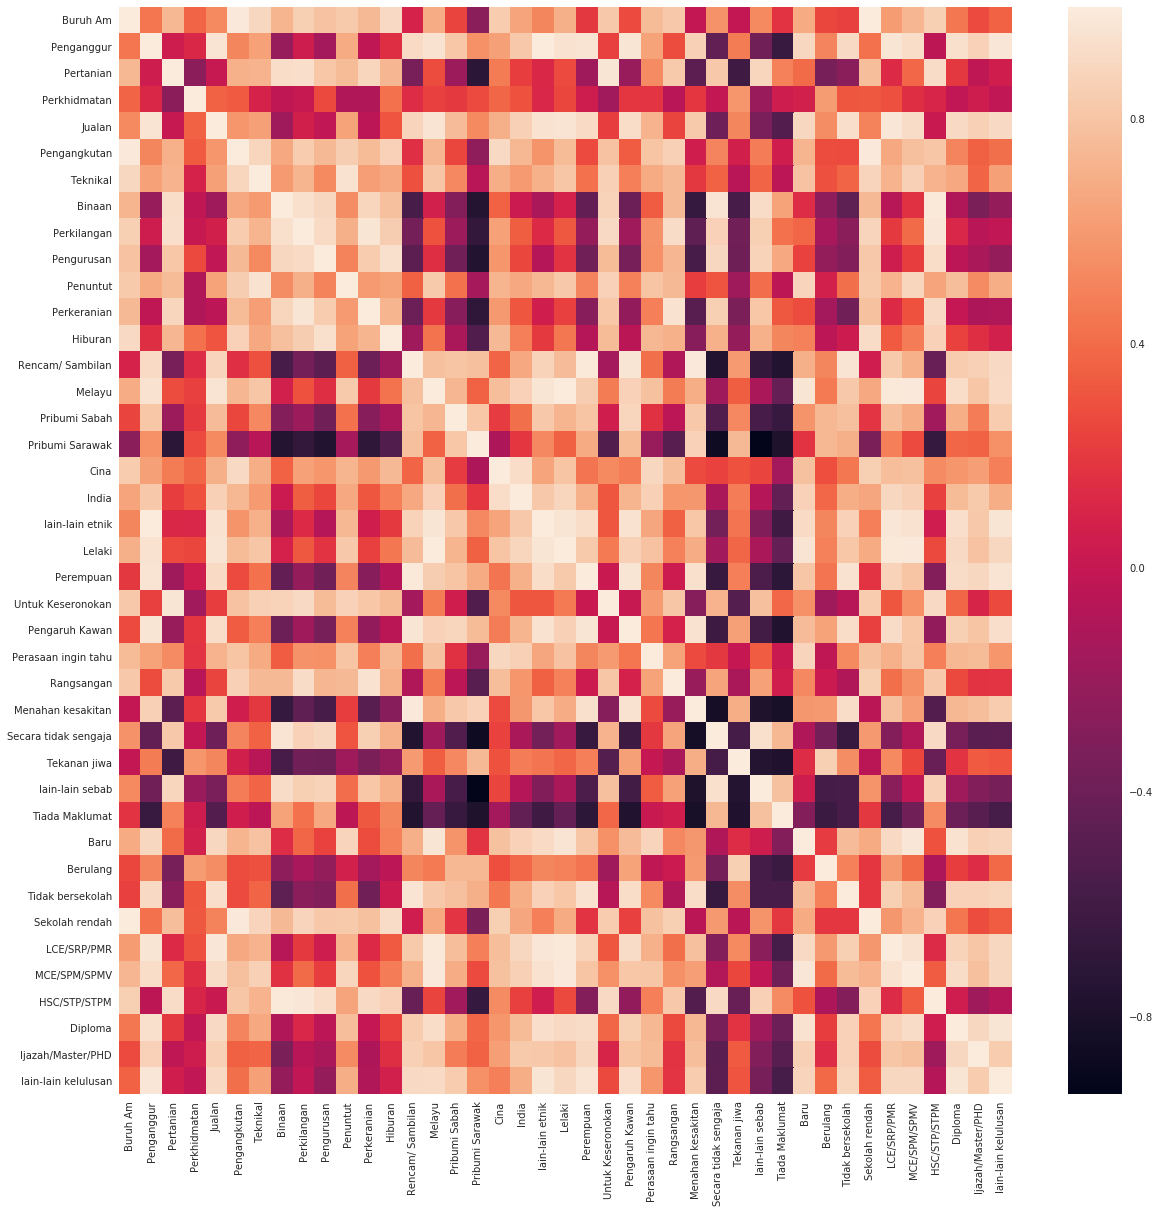

In [12]:
plt.figure(figsize = (20, 20))
# just change to annot = True, to get value visualization
sns.heatmap(whole_dadah.iloc[:, 1:].corr(), annot = False)
plt.show()

In [14]:
statistik_jenayah = pd.read_csv(location + files[0])
statistik_jenayah.head()

,NEGERI,TAHUN,BUNUH,ROGOL,SAMUN BERKAWAN BERS/API,SAMUN BERKAWAN TANPA BERS/API,SAMUN BERSENJATAPI,SAMUN TANPA S/API,MENCEDERAKAN,CURI,CURI MOTOKAR,CURI MOTOSIKAL,CURI VAN/LORI/J'BERAT,CURI RAGUT,PECAH RUMAH DAN CURI
0,JOHOR,2009,74,656,87,5028,11,1374,1144,4211,1755,8825,612,99,3391
1,KEDAH,2009,33,378,46,534,8,321,539,2422,526,4958,122,540,2502
2,KELANTAN,2009,8,314,16,122,9,52,421,868,775,2841,69,391,1515
3,KUALA LUMPUR,2009,64,153,127,6156,35,942,772,7510,3138,6286,726,3341,4531
4,MELAKA,2009,12,105,1,240,1,89,294,1523,226,1520,59,232,1321


Right now we dont have any 2009 data, skip it

In [23]:
statistik_jenayah = statistik_jenayah.loc[statistik_jenayah['TAHUN'] != 2009]
statistik_jenayah.head()

,NEGERI,TAHUN,BUNUH,ROGOL,SAMUN BERKAWAN BERS/API,SAMUN BERKAWAN TANPA BERS/API,SAMUN BERSENJATAPI,SAMUN TANPA S/API,MENCEDERAKAN,CURI,CURI MOTOKAR,CURI MOTOSIKAL,CURI VAN/LORI/J'BERAT,CURI RAGUT,PECAH RUMAH DAN CURI
15,JOHOR,2010,58,619,142,2713,23,648,1026,4356,1667,7812,538,84,2741
16,KEDAH,2010,24,352,103,486,20,237,492,2225,530,4698,109,411,2035
17,KELANTAN,2010,21,311,38,74,13,59,386,909,777,2776,125,295,1426
18,KUALA LUMPUR,2010,61,161,100,3931,21,933,969,6186,3482,5319,753,1897,4682
19,MELAKA,2010,9,105,7,266,1,71,263,1256,253,1875,68,122,1073


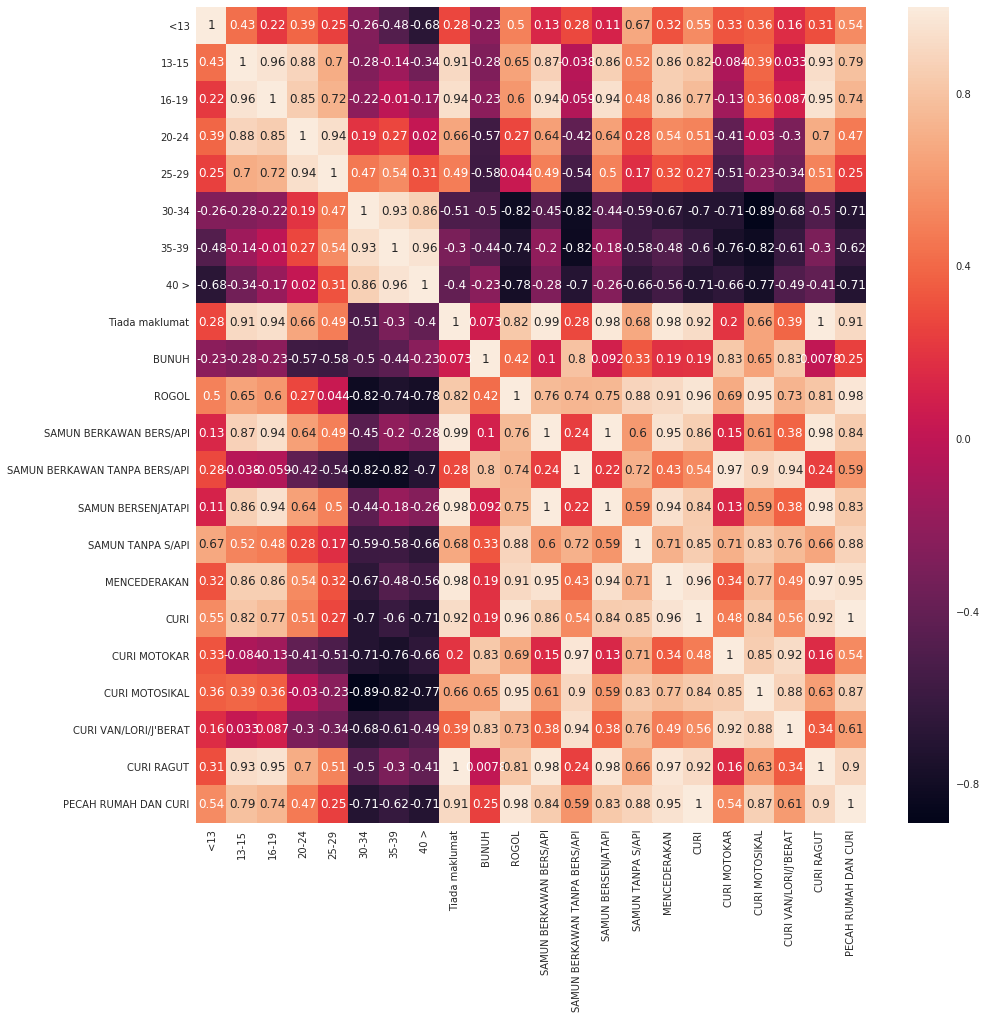

In [17]:
umur = pd.read_csv(location + files[1])
umur = umur.iloc[1:-2, :-1]
statistik_jenayah_tahun = statistik_jenayah.loc[statistik_jenayah['NEGERI'] != 'Jumlah'].iloc[:, :]
years = np.unique(statistik_jenayah_tahun['TAHUN'])
list_column = list(statistik_jenayah_tahun.iloc[:, 2:])
total_years = []
for i in range(years.shape[0]):
    total_years.append(statistik_jenayah_tahun.loc[statistik_jenayah_tahun['TAHUN'] == years[i]].iloc[:, 2:].sum().values)
    
array = np.array(total_years)
for i, k in enumerate(list_column):
    umur[k] = array[:, i]
    
plt.figure(figsize = (15, 15))
sns.heatmap(umur.iloc[:, 1:].corr(), annot = True)
plt.show()

Even teenagers age less than 13 got +0.54 for PECAH RUMAH DAN CURI! what happen to Malaysia?!

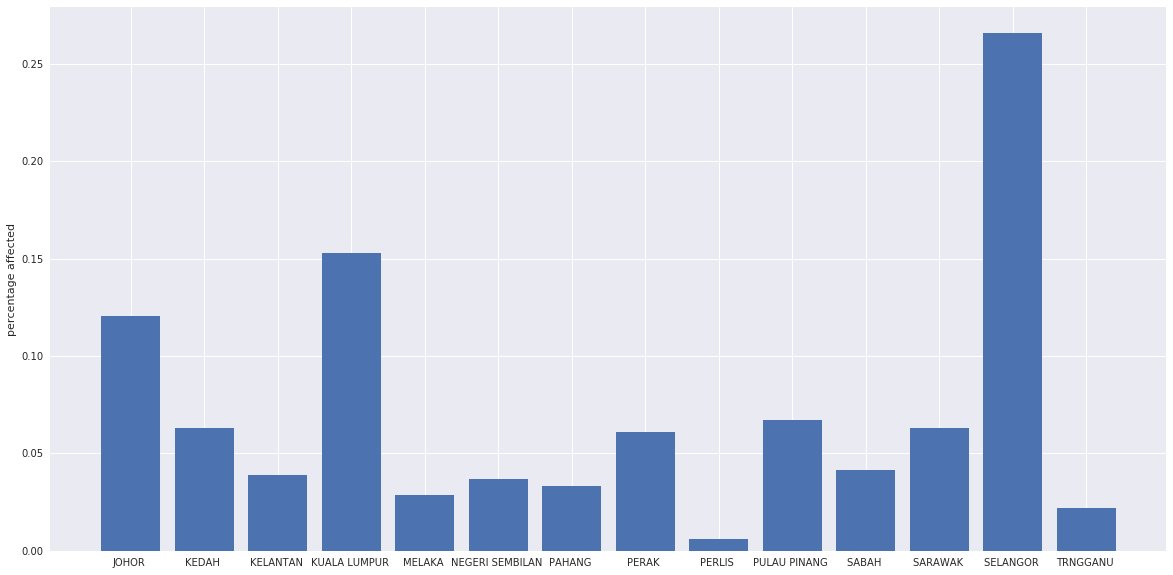

In [18]:
plt.figure(figsize = (20, 10))
statistik_2010 = statistik_jenayah.loc[statistik_jenayah['TAHUN'] == 2010].iloc[:-1, :]
y = np.arange(statistik_2010.shape[0])
percentage = [statistik_2010.iloc[i, 2:].sum().sum() / (statistik_2010.iloc[:, 2:].sum().sum() * 1.0) for i in range(statistik_2010.shape[0])]
plt.bar(y, percentage)
plt.xticks(y, statistik_2010['NEGERI'])
plt.ylabel('percentage affected')
plt.show()

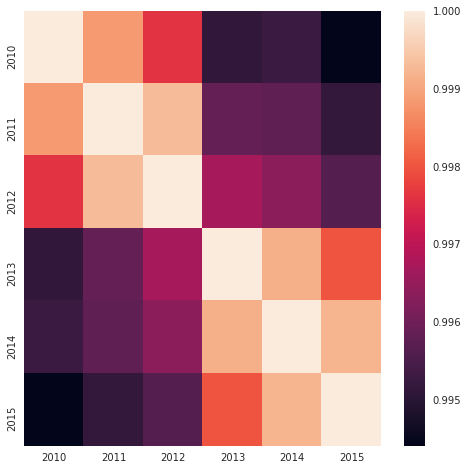

In [19]:
statistik_jenayah_tahun = statistik_jenayah.loc[statistik_jenayah['NEGERI'] != 'Jumlah'].iloc[:, :]
years = np.unique(statistik_jenayah_tahun['TAHUN'])
total_years = []
for i in range(years.shape[0]):
    total_years.append(statistik_jenayah_tahun.loc[statistik_jenayah_tahun['TAHUN'] == years[i]].iloc[:, 1:].sum(axis = 1))
df_total = pd.DataFrame(np.array(total_years).T, columns = years)
plt.figure(figsize = (8, 8))
sns.heatmap(df_total.corr(), annot = False)
plt.show()

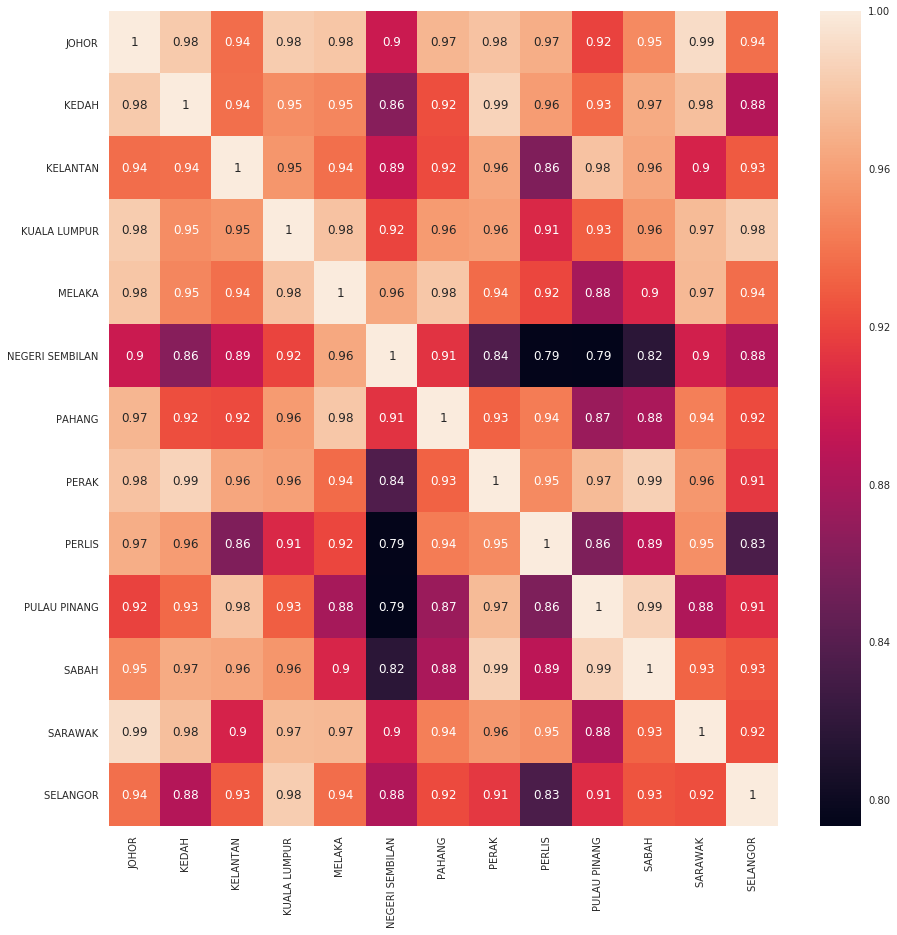

In [43]:
statistik_jenayah_negeri = statistik_jenayah.loc[statistik_jenayah['NEGERI'] != 'Jumlah'].iloc[:, :]
total_negeri = []
negeri = np.unique(statistik_jenayah['NEGERI']).tolist()
del negeri[negeri.index('Jumlah')]
del negeri[negeri.index('TERENG- GANU ')]
for i in range(len(negeri) - 1):
    inner = statistik_jenayah_negeri.loc[statistik_jenayah_tahun['NEGERI'] == negeri[i]].iloc[:, 2:].sum(axis = 1)
    total_negeri.append(inner)
df_total = pd.DataFrame(np.array(total_negeri).T, columns = negeri[:-1])
plt.figure(figsize = (15, 15))
sns.heatmap(df_total.corr(), annot = True)
plt.show()

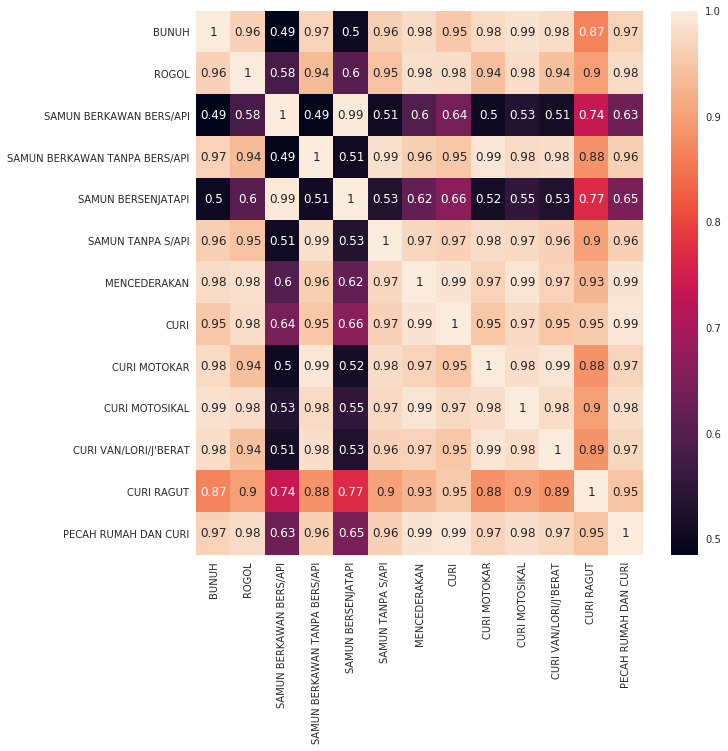

In [45]:
plt.figure(figsize = (10, 10))
sns.heatmap(statistik_jenayah.iloc[:, 2:].corr(), annot = True)
plt.show()

You can do your own story telling based on these pearson correlation visualization!